In [2]:
%%capture 
!pip install fastai==1.0.61

In [3]:
import boto3
import os
import numpy as np
import torch
from pathlib import Path
from argparse import Namespace
from fastai.vision import *
from fastai import *

args = Namespace(
    root = "/".join(os.getcwd().split("/")[:-1]),
    bucket_name = "sagemaker-us-west-2-430127992102",
    key = "ClassificationModel",
    image_dir = "fastai_data",
    data_dir = "dataset",
    tar_file_name = "dataset.tar.gz",
    model_dir = "model",
    tar_model_name = "model.tar.gz"
)

model_path = os.path.join(args.root, args.model_dir)
data_path = Path(os.path.join(args.root, args.data_dir))
labels = os.listdir(data_path)

s3 = boto3.resource('s3')

In [5]:
loc = torch.load(os.path.join(model_path,'student-stage-2.pth'), map_location=torch.device('cpu'))

In [11]:
body = create_body(models.resnet18, True, None)
data_classes = 20
nf = callbacks.hooks.num_features_model(body) * 2
head = create_head(nf, data_classes, None, ps=0.5, bn_final=False)
model = nn.Sequential(body, head)

In [12]:
model.load_state_dict(loc['model'])

<All keys matched successfully>

In [30]:
model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
names = ['aguacate',
 'arroz_basmati_castellanox1000g',
 'arroz_blanco_carullax1000g',
 'arroz_vitamor_dianax500g',
 'chicharron_americano_jacksx15g',
 'coca_cola_originalx250ml',
 'coca_cola_originalx400ml',
 'mango_tommy',
 'maracuya',
 'pan_de_queso_la_frontera',
 'pan_mantequilla_la_fronterax55g',
 'papas_limon_margarita_packeconomicox300g',
 'papas_limon_margaritax105g',
 'papas_limon_margaritax110g',
 'papas_limon_margaritax39g',
 'spagheti_barilla',
 'yogurt_alpina_finesse_fresax150g',
 'yogurt_alpina_finesse_fresax180g',
 'yogurt_alpina_finesse_frutos_rojosx180g',
 'yogurt_alpina_finesse_melocotonx180g']

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=832x334 at 0x7F6C7E443F60>
tensor([[2.7692e-07, 1.2289e-07, 5.1297e-08, 8.7143e-09, 3.1451e-09, 1.8523e-07,
         3.3581e-07, 9.9995e-01, 3.0235e-07, 2.4262e-07, 3.7862e-07, 3.4945e-05,
         1.0362e-06, 9.2533e-07, 4.5216e-08, 7.3089e-06, 6.3920e-08, 3.0092e-08,
         6.0028e-06, 1.2940e-07]])
mango_tommy 0.9999476671218872


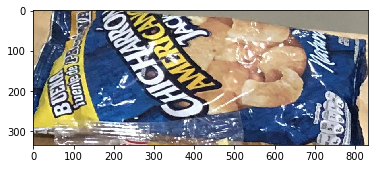

In [91]:
import json
from PIL import Image
from IPython.display import Image as image
from torchvision.transforms import ToTensor
#!curl "https://www.merkadomi.com/wp-content/uploads/2018/07/COCA-COLA-ORIGINAL-400ML.jpg" --output test.jpg
img_path = 'test7.jpg'
img = Image.open(img_path)
print(img)

img = ToTensor()(img).unsqueeze(0)
plt.imshow(  img.squeeze().permute(1, 2, 0)  )
img = img.div_(255)

output = torch.nn.functional.softmax(model(img),dim=1).data
print(output)
idx = output.argmax()
pred_cls = names[idx]
print(pred_cls, output[0,idx].item())

#!rm test.jpg
